In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.classifier import ClassificationReport, ClassificationScoreVisualizer

In [4]:
fixtures = pd.read_csv('fixtures.csv')

#cleaning fixtures data

fixtures = fixtures[9663:923:-1].reset_index()
fixtures.drop(['index', 'Div', 'Date', 'Season'], inplace=True, axis=1)
fixtures.loc[:,'HTHG'] = fixtures['HTHG'].astype(int)
fixtures.loc[:,'HTAG'] = fixtures['HTAG'].astype(int)


seasons = np.arange(2018, 1995 , -1)
fixtures.loc[:,'Season'] = pd.Series(np.repeat(seasons , 380))

fixtures.loc[fixtures['HomeTeam'] == 'Middlesboro','HomeTeam'] = 'Middlesbrough'
fixtures.loc[fixtures['AwayTeam'] == 'Middlesboro', 'AwayTeam'] = 'Middlesbrough'

fixtures['HGD']=pd.Series((fixtures['HTHG']-fixtures['HTAG']))
fixtures['FGD']=pd.Series((fixtures['FTHG']-fixtures['FTAG']))

fixtures.head(10)
# len(fixtures)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,HGD,FGD
0,West Ham,Everton,3,1,H,1,0,H,2018,1,2
1,Tottenham,Leicester,5,4,H,1,2,A,2018,-1,1
2,Swansea,Stoke,1,2,A,1,2,A,2018,-1,-1
3,Southampton,Man City,0,1,A,0,0,D,2018,0,-1
4,Newcastle,Chelsea,3,0,H,1,0,H,2018,1,3
5,Man United,Watford,1,0,H,1,0,H,2018,1,1
6,Liverpool,Brighton,4,0,H,2,0,H,2018,2,4
7,Huddersfield,Arsenal,0,1,A,0,1,A,2018,-1,-1
8,Crystal Palace,West Brom,2,0,H,0,0,D,2018,0,2
9,Burnley,Bournemouth,1,2,A,1,0,H,2018,1,-1


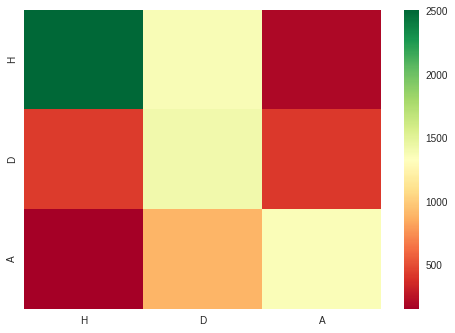

In [5]:
hm1 = fixtures["FTR"][fixtures["HTR"]=="H"].value_counts()["H"]
hm4 = fixtures["FTR"][fixtures["HTR"]=="H"].value_counts()["D"]
hm7 = fixtures["FTR"][fixtures["HTR"]=="H"].value_counts()["A"]
hm2 = fixtures["FTR"][fixtures["HTR"]=="D"].value_counts()["H"]
hm5 = fixtures["FTR"][fixtures["HTR"]=="D"].value_counts()["D"]
hm8 = fixtures["FTR"][fixtures["HTR"]=="D"].value_counts()["A"]
hm3 = fixtures["FTR"][fixtures["HTR"]=="A"].value_counts()["H"]
hm6 = fixtures["FTR"][fixtures["HTR"]=="A"].value_counts()["D"]
hm9 = fixtures["FTR"][fixtures["HTR"]=="A"].value_counts()["A"]
arr = np.array([hm1, hm2, hm3, hm4, hm5, hm6, hm7, hm8, hm9])
arr = np.resize(arr , (3,3))
df = pd.DataFrame(arr, columns=('H', 'D', 'A'), index = ['H', 'D', 'A'])
sns.heatmap(df , cmap = "RdYlGn")
plt.show()

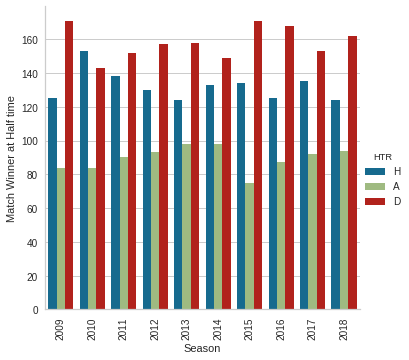

In [6]:
half = sns.catplot('Season', data=fixtures, kind='count', hue='HTR', order=range(2009,2019))
half.set_ylabels('Match Winner at Half time')
half.set_xticklabels(rotation=90);

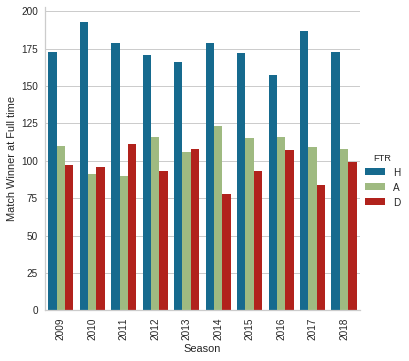

In [7]:
full = sns.catplot('Season', data=fixtures, kind='count', hue='FTR', order=range(2009,2019))
full.set_ylabels('Match Winner at Full time')
full.set_xticklabels(rotation=90);

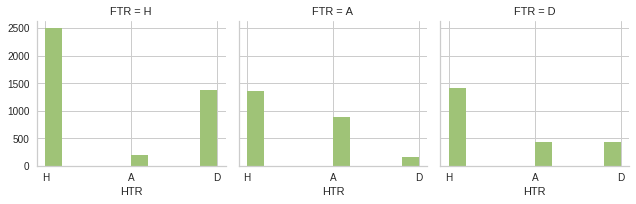

In [8]:
g = sns.FacetGrid(fixtures, col = "FTR")
g = (g.map(plt.hist , "HTR" , color = 'g')).set_xticklabels(["H", "A", "D"])
plt.show()

In [9]:
positions = pd.read_csv('positions.csv')

positions.loc[positions['team']=='West Ham', 'team']='West Ham United'
positions = positions[20:502].reset_index()
positions.drop(['season','name','index','gd','f','a'], axis=1, inplace=True)
seasons = np.arange(2018,1994,-1)
dup = np.repeat(seasons,20)
dup = np.append(dup,[1995,1995])
positions.loc[:,'Season']=pd.Series(dup)

positions.head()

,pos,team,p,w,d,l,points,Season
0,1,Manchester City,38,32,4,2,100,2018
1,2,Manchester United,38,25,6,7,81,2018
2,3,Tottenham Hotspur,38,23,8,7,77,2018
3,4,Liverpool,38,21,12,5,75,2018
4,5,Chelsea,38,21,7,10,70,2018


In [10]:
temp = positions[:460]
fix_teams = np.array(sorted(list(set(fixtures['HomeTeam']))))
pos_teamsi = np.array(sorted(list(set(temp['team']))))

pos_teams = [vals.strip() for vals in pos_teamsi]

val = dict(zip(fix_teams, pos_teams))
val2 = dict(zip(pos_teamsi , pos_teams))

fixtures['HomeTeam'].replace(val, inplace=True)
fixtures['AwayTeam'].replace(val,inplace=True)
positions['team'].replace(val2,inplace=True)

In [11]:
#form 

seasons=sorted(list(set(positions['Season'])), reverse=True)
teams=list(set(positions['team']))
# teams

total = positions['points'].groupby(positions['Season']).max()
indices=total.index.values.tolist()
# indices

forms=[]

for team, season in zip(positions['team'],positions['Season']):
    if season>1994:
        totalpoints=0
        points=(np.sum(positions['points'].where((positions['team']==team) & (positions['Season']<=season) & (positions['Season']>(season-2)) )))
        totalpoints=np.sum(total.where((total.index.values<=season) & (total.index.values>(season-2))))
        form=(points/totalpoints)
        forms.append(form)
    else: 
        forms.append(0.0)
        
positions['form']=pd.Series(forms)


positions.head()

,pos,team,p,w,d,l,points,Season,form
0,1,Manchester City,38,32,4,2,100,2018,0.922280
1,2,Manchester United,38,25,6,7,81,2018,0.777202
2,3,Tottenham Hotspur,38,23,8,7,77,2018,0.844560
3,4,Liverpool,38,21,12,5,75,2018,0.782383
4,5,Chelsea,38,21,7,10,70,2018,0.844560


In [12]:
Teams = np.unique(fixtures['HomeTeam'])
Teams

array(['Arsenal', 'Aston Villa', 'Barnsley', 'Birmingham City',
       'Blackburn Rovers', 'Blackpool', 'Bolton Wanderers', 'Bournemouth',
       'Bradford City', 'Brighton', 'Burnley', 'Cardiff City',
       'Charlton Athletic', 'Chelsea', 'Coventry City', 'Crystal Palace',
       'Derby County', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Ipswich Town', 'Leeds United', 'Leicester City',
       'Liverpool', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Portsmouth', 'Queens Park Rangers',
       'Reading', 'Sheffield United', 'Sheffield Wednesday',
       'Southampton', 'Stoke City', 'Sunderland', 'Swansea City',
       'Tottenham Hotspur', 'Watford', 'West Bromwich Albion',
       'West Ham United', 'Wigan', 'Wimbledon', 'Wolverhampton Wanderers'],
      dtype=object)

In [13]:
Results = np.unique(fixtures['HTR'])
Results

array(['A', 'D', 'H'], dtype=object)

In [14]:
df=fixtures.copy()

enc1 = LabelEncoder()

df['HomeTeam'] = enc1.fit_transform(df['HomeTeam'])
df['AwayTeam'] = enc1.transform(df['AwayTeam'])

AllTeams = dict(zip(Teams, enc1.transform(Teams)))
AllTeams_inverse = dict(zip(enc1.transform(Teams), Teams))

enc2 = LabelEncoder()

df['HTR'] = enc2.fit_transform(df['HTR'])
df['FTR'] = enc2.transform(df['FTR'])

AllResults = dict(zip(Results , enc2.transform(Results)))
AllResults_inverse = dict(zip(enc2.transform(Results), Results))


df.head(10)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,HGD,FGD
0,43,17,3,1,2,1,0,2,2018,1,2
1,40,23,5,4,2,1,2,0,2018,-1,1
2,39,37,1,2,0,1,2,0,2018,-1,-1
3,36,25,0,1,0,0,0,1,2018,0,-1
4,28,13,3,0,2,1,0,2,2018,1,3
5,26,41,1,0,2,1,0,2,2018,1,1
6,24,9,4,0,2,2,0,2,2018,2,4
7,19,0,0,1,0,0,1,0,2018,-1,-1
8,15,42,2,0,2,0,0,1,2018,0,2
9,10,7,1,2,0,1,0,2,2018,1,-1


In [15]:
X_train, X_test ,y_train , y_test = train_test_split(df[['HomeTeam','AwayTeam','HTR']], df['FTR'], random_state = 0)

KNeighborsClassifier : 0.5620137299771167


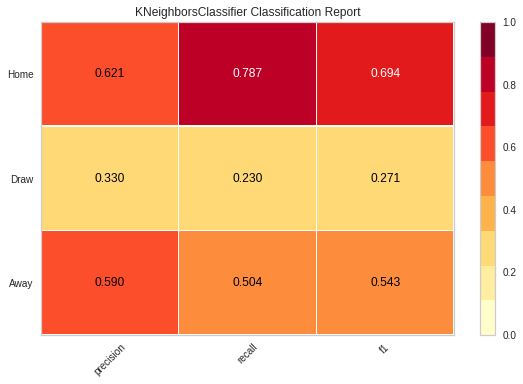

In [16]:
neigh = KNeighborsClassifier(n_neighbors=18)
pred = neigh.fit(X_train, y_train).predict(X_test)

score = accuracy_score(y_test, pred)
print('KNeighborsClassifier : {}'.format(score))

visual = ClassificationReport(neigh, classes=['Away','Draw','Home'])
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
graph = visual.poof()

DecisionTreeClassifier : 0.6100686498855835


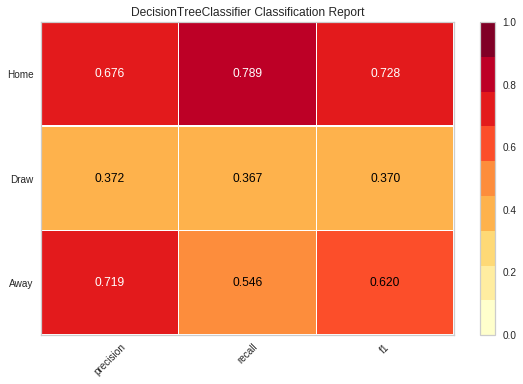

In [17]:
decision = DecisionTreeClassifier(max_depth=4)
pred = decision.fit(X_train, y_train).predict(X_test)

score = accuracy_score(y_test, pred)
print('DecisionTreeClassifier : {}'.format(score))

visual = ClassificationReport(decision , classes=['Away','Draw','Home'])
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
graph = visual.poof()

Naive-Bayes : 0.602745995423341


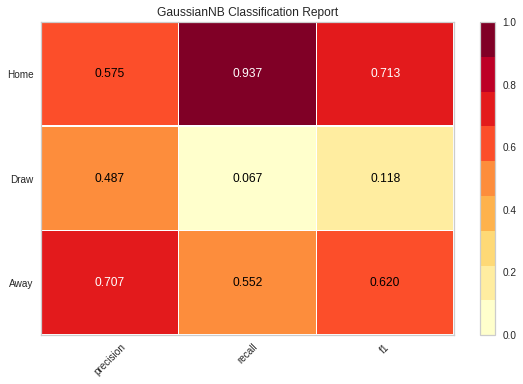

In [18]:
naive = GaussianNB()
pred = naive.fit(X_train, y_train).predict(X_test)

score = accuracy_score(y_test, pred)
print('Naive-Bayes : {}'.format(score))

visual = ClassificationReport(naive , classes=['Away','Draw','Home'])
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
graph = visual.poof()

RandomForestClassifier : 0.6183066361556064


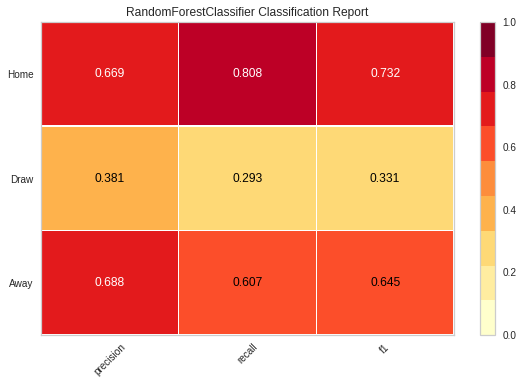

In [19]:
rfc = RandomForestClassifier(n_estimators=90, max_depth=4)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

score = accuracy_score(y_test, pred)
print('RandomForestClassifier : {}'.format(score))

visual = ClassificationReport(rfc , classes=['Away','Draw','Home'])
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
graph = visual.poof()

SVC - linear : 0.5949656750572082


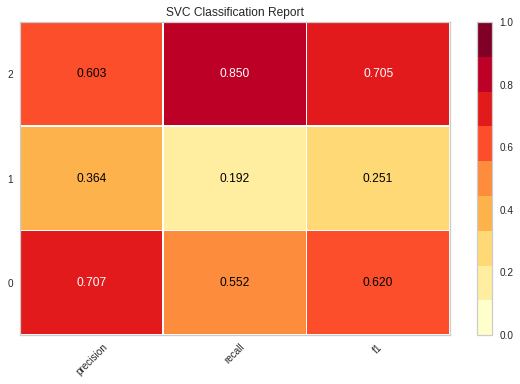

In [20]:
svc = SVC(kernel='linear', gamma='auto', random_state=0)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

score = accuracy_score(y_test, pred)
print('SVC - linear : {}'.format(score))

visual = ClassificationReport(svc)
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
graph = visual.poof()

SVC-rbf : 0.5661327231121281


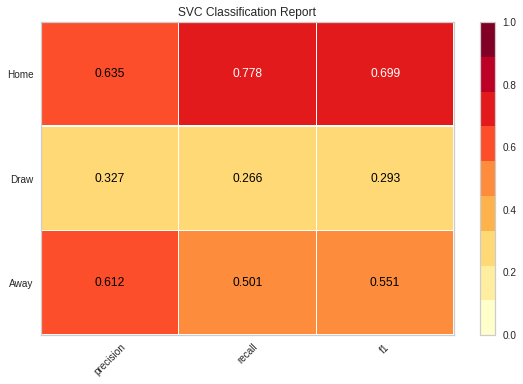

In [21]:
rbf = SVC(kernel='rbf', gamma='auto')
pred = rbf.fit(X_train, y_train).predict(X_test)

score = accuracy_score(y_test, pred)
print('SVC-rbf : {}'.format(score))

visual = ClassificationReport(rbf , classes=['Away','Draw','Home'])
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
graph = visual.poof()

In [24]:
import pickle

pickle.dump(rfc,open('final_predictions.pickle', 'wb'))
pickle.dump(AllTeams , open('allteams.pickle', 'wb'))
pickle.dump(AllResults, open('allresults.pickle', 'wb'))

In [25]:
positions.to_csv('final_positions.csv')
fixtures.to_csv('final_fixtures.csv')